In [6]:
import json
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl
from sklearn.metrics import roc_curve, auc
from scipy import stats

In [7]:
num_digts = 9
sudoku_dir = f'sudoku_{num_digts}x{num_digts}'

non_perturbed_dataset = 'standard'
datasets = [
    'rotated'
]
# noise_pcts = [10, 20, 30, 40, 50, 60, 70, 80, 90]
noise_pcts = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
FONT_SIZE = 14
TICK_FONT_SIZE = 14
mpl.rcParams['xtick.labelsize'] = TICK_FONT_SIZE
mpl.rcParams['ytick.labelsize'] = TICK_FONT_SIZE

In [8]:
def get_baseline_results(method, dataset, data_size='small', use_structured=False):
    if not use_structured:
        struc_unstruc_acc = 'unstructured_test_accuracy'
    else:
        struc_unstruc_acc = 'structured_test_accuracy'
    # need to build array of results for noise pcts
    acc = []
    acc_stds = []

    # get standard
    np_0 = json.loads(open(f'{sudoku_dir}/results/{method}/{data_size}/standard.json').read())
    acc.append(np_0['noise_pct_0'][struc_unstruc_acc]['mean'])
    acc_stds.append(np_0['noise_pct_0'][struc_unstruc_acc]['std_err'])

    # other noise pcts
    np_res = json.loads(open(f'{sudoku_dir}/results/{method}/{data_size}/{dataset}.json').read())
    for n in noise_pcts:
        acc.append(np_res['noise_pct_' + str(n)][struc_unstruc_acc]['mean'])
        acc_stds.append(np_res['noise_pct_' + str(n)][struc_unstruc_acc]['std_err'])
    return acc, acc_stds

In [9]:
def get_nsl_results(net_type, dataset, is_prob=False, use_structured=True):
    acc_metric = 'accuracy'

    struct_unstructured = "structured" if use_structured else "unstructured"

    # need to build array of results for noise pcts
    acc = []
    acc_stds = []

    base_dir = f'{sudoku_dir}/results/{"prob_nsl" if is_prob else "nsl"}'

    # get standard
    np_0 = json.loads(open(f"{base_dir}/{struct_unstructured}/{net_type}/standard.json").read())
    acc.append(np_0['noise_pct_0'][acc_metric]['mean'])
    acc_stds.append(np_0['noise_pct_0'][acc_metric]['std_err'])

    # other noise pcts
    np_res = json.loads(open(f"{base_dir}/{struct_unstructured}/{net_type}/{dataset}.json").read())
    for n in noise_pcts:
        acc.append(np_res['noise_pct_' + str(n)][acc_metric]['mean'])
        acc_stds.append(np_res['noise_pct_' + str(n)][acc_metric]['std_err'])
    return acc, acc_stds


# Stuctured Test Data

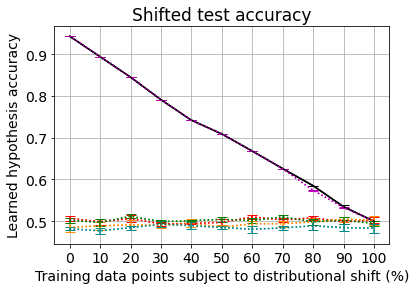

In [10]:
fig, ax = plt.subplots()

nps_x = [0] + noise_pcts
i = 0
use_structured = False

# Prob FF-NSL standard
nsl_acc, nsl_err = get_nsl_results('softmax', datasets[i], is_prob=True, use_structured=use_structured)
ax.plot(nps_x, nsl_acc, label="Prob FF-NSL Softmax 320 examples", color="k", linestyle='-')
ax.errorbar(nps_x, nsl_acc, yerr=nsl_err, color="k", capsize=5, linestyle='-')

# Prob FF-NSL edl_gen
# nsl_acc, nsl_err = get_nsl_results('edl_gen', datasets[i], is_prob=True, use_structured=use_structured)
# ax.plot(nps_x, nsl_acc, label="Prob FF-NSL EDL-GEN 320 examples", color="b", linestyle='-')
# ax.errorbar(nps_x, nsl_acc, yerr=nsl_err, color="b", capsize=5, linestyle='-')


# FF-NSL standard
nsl_acc, nsl_err = get_nsl_results('softmax', datasets[i], use_structured=use_structured)
ax.plot(nps_x, nsl_acc, label="FF-NSL Softmax 320 examples", color="m", linestyle=':')
ax.errorbar(nps_x, nsl_acc, yerr=nsl_err, color="m", capsize=5, linestyle=':')

# FF-NSL edl_gen
# nsl_acc, nsl_err = get_nsl_results('edl_gen', datasets[i], use_structured=use_structured)
# ax.plot(nps_x, nsl_acc, label="FF-NSL EDL-GEN 320 examples", color="c", linestyle=':')
# ax.errorbar(nps_x, nsl_acc, yerr=nsl_err, color="c", capsize=5, linestyle=':')

# Random Forest Small
rf_acc, rf_err = get_baseline_results('rf', datasets[i], use_structured=use_structured)
ax.plot(nps_x, rf_acc, label="RF 320 examples", color="r", linestyle=':')
ax.errorbar(nps_x, rf_acc, yerr=rf_err, color="r", capsize=5, linestyle=':')

# Random Forest Large
rf_acc, rf_err = get_baseline_results('rf', datasets[i], data_size='large', use_structured=use_structured)
ax.plot(nps_x, rf_acc, label="RF 32,000 examples", color="darkorange", linestyle=':')
ax.errorbar(nps_x, rf_acc, yerr=rf_err, color="darkorange", capsize=5, linestyle=':')

# CNN LSTM Small
fcn_acc, fcn_err = get_baseline_results('cnn_lstm', datasets[i], use_structured=use_structured)
ax.plot(nps_x, fcn_acc, label="CNN-LSTM 320 examples", color="g", linestyle=':')
ax.errorbar(nps_x, fcn_acc, yerr=fcn_err, color="g", capsize=5, linestyle=':')

# CNN LSTM Large
fcn_acc, fcn_err = get_baseline_results('cnn_lstm', datasets[i], data_size='large', use_structured=use_structured)
ax.plot(nps_x, fcn_acc, label="CNN-LSTM 32,000 examples", color="darkcyan", linestyle=':')
ax.errorbar(nps_x, fcn_acc, yerr=fcn_err, color="darkcyan", capsize=5, linestyle=':')

ax.set_xticks(nps_x)
#axes[i].set_yticks(np.arange(0.45,1.01,0.05))
ax.set_xlabel('Training data points subject to distributional shift (%)', fontsize=FONT_SIZE)
ax.set_ylabel('Learned hypothesis accuracy', fontsize=FONT_SIZE)
#     axes[i].set_title(datasets[i])
ax.grid(True)
legend = ax.legend(bbox_to_anchor=(1.05, 1.23), fontsize=9, ncol=3, borderaxespad=0)


def export_legend(legend, filename=f"{sudoku_dir}_legend.png", expand=[-5, -5, 5, 5]):
    fig = legend.figure
    fig.canvas.draw()
    bbox = legend.get_window_extent()
    bbox = bbox.from_extents(*(bbox.extents + np.array(expand)))
    bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi=500, bbox_inches=bbox, format='png')


export_legend(legend)
ax.get_legend().remove()
plt.title(f"{'True' if use_structured else 'Shifted'} test accuracy", fontsize=17)
plt.savefig(f'{sudoku_dir}_{"" if use_structured else "un"}structured_test_data_results.png', dpi=500, format='png', bbox_inches='tight')
plt.show()
